# Early Disease Detection Using Decision Tree Model

- importing all necessary modules

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder


- loading dataset into dataframe

In [8]:
df = pd.read_csv('class2_ds.csv')
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


# EDA

- data types and counts of each column
- concise summaries of the data
- checking for null values

In [9]:
df.info()
print(df.describe())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB
                 id        active           age          alco         ap

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

<Axes: xlabel='disease', ylabel='count'>

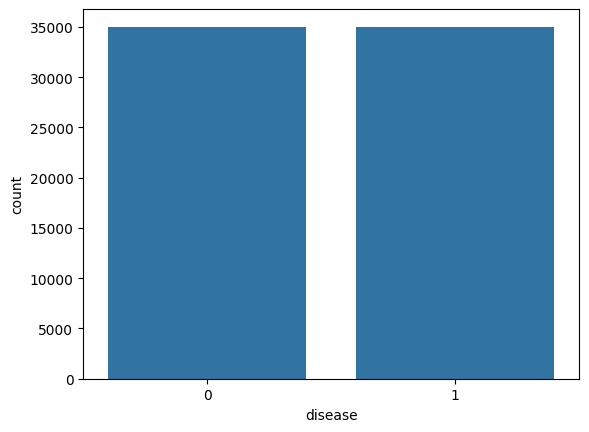

In [4]:
sns.countplot(x='disease', data=df)


- numeric distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>, <Axes: >]], dtype=object)

Error in callback <function _draw_all_if_interactive at 0x0000022D442D4310> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

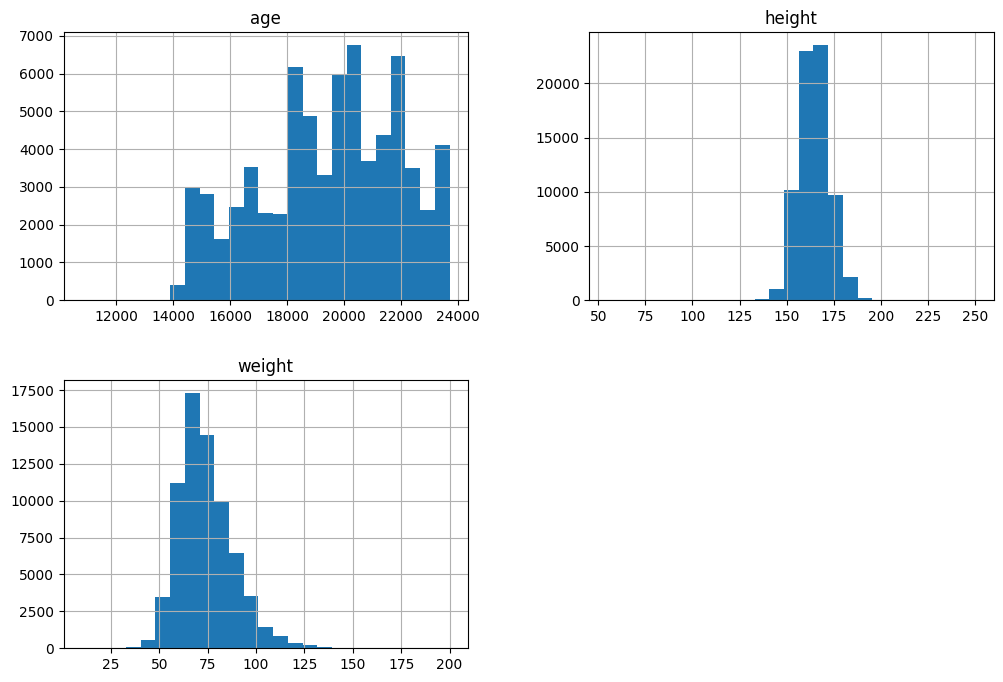

In [5]:
df.hist(column=['age', 'height',  'weight'], bins=25, figsize=(12,8))


In [ ]:
categorical_features = [col for col in df.columns if col not in ['date', 'id','age','ap_hi','ap_lo','height','weight']]

plt.figure(figsize=(16,20))

for i, col in enumerate(categorical_features):
    plt.subplot(3,3, i+1)
    sns.countplot(x=col, hue= 'disease', data = df)
    plt.title(f'{col} vs Disease')
    plt.xticks(rotation = 30)
    plt.tight_layout()
    
plt.show()

- grid of boxplots to view the distribution with median, quartiles, and outliers.

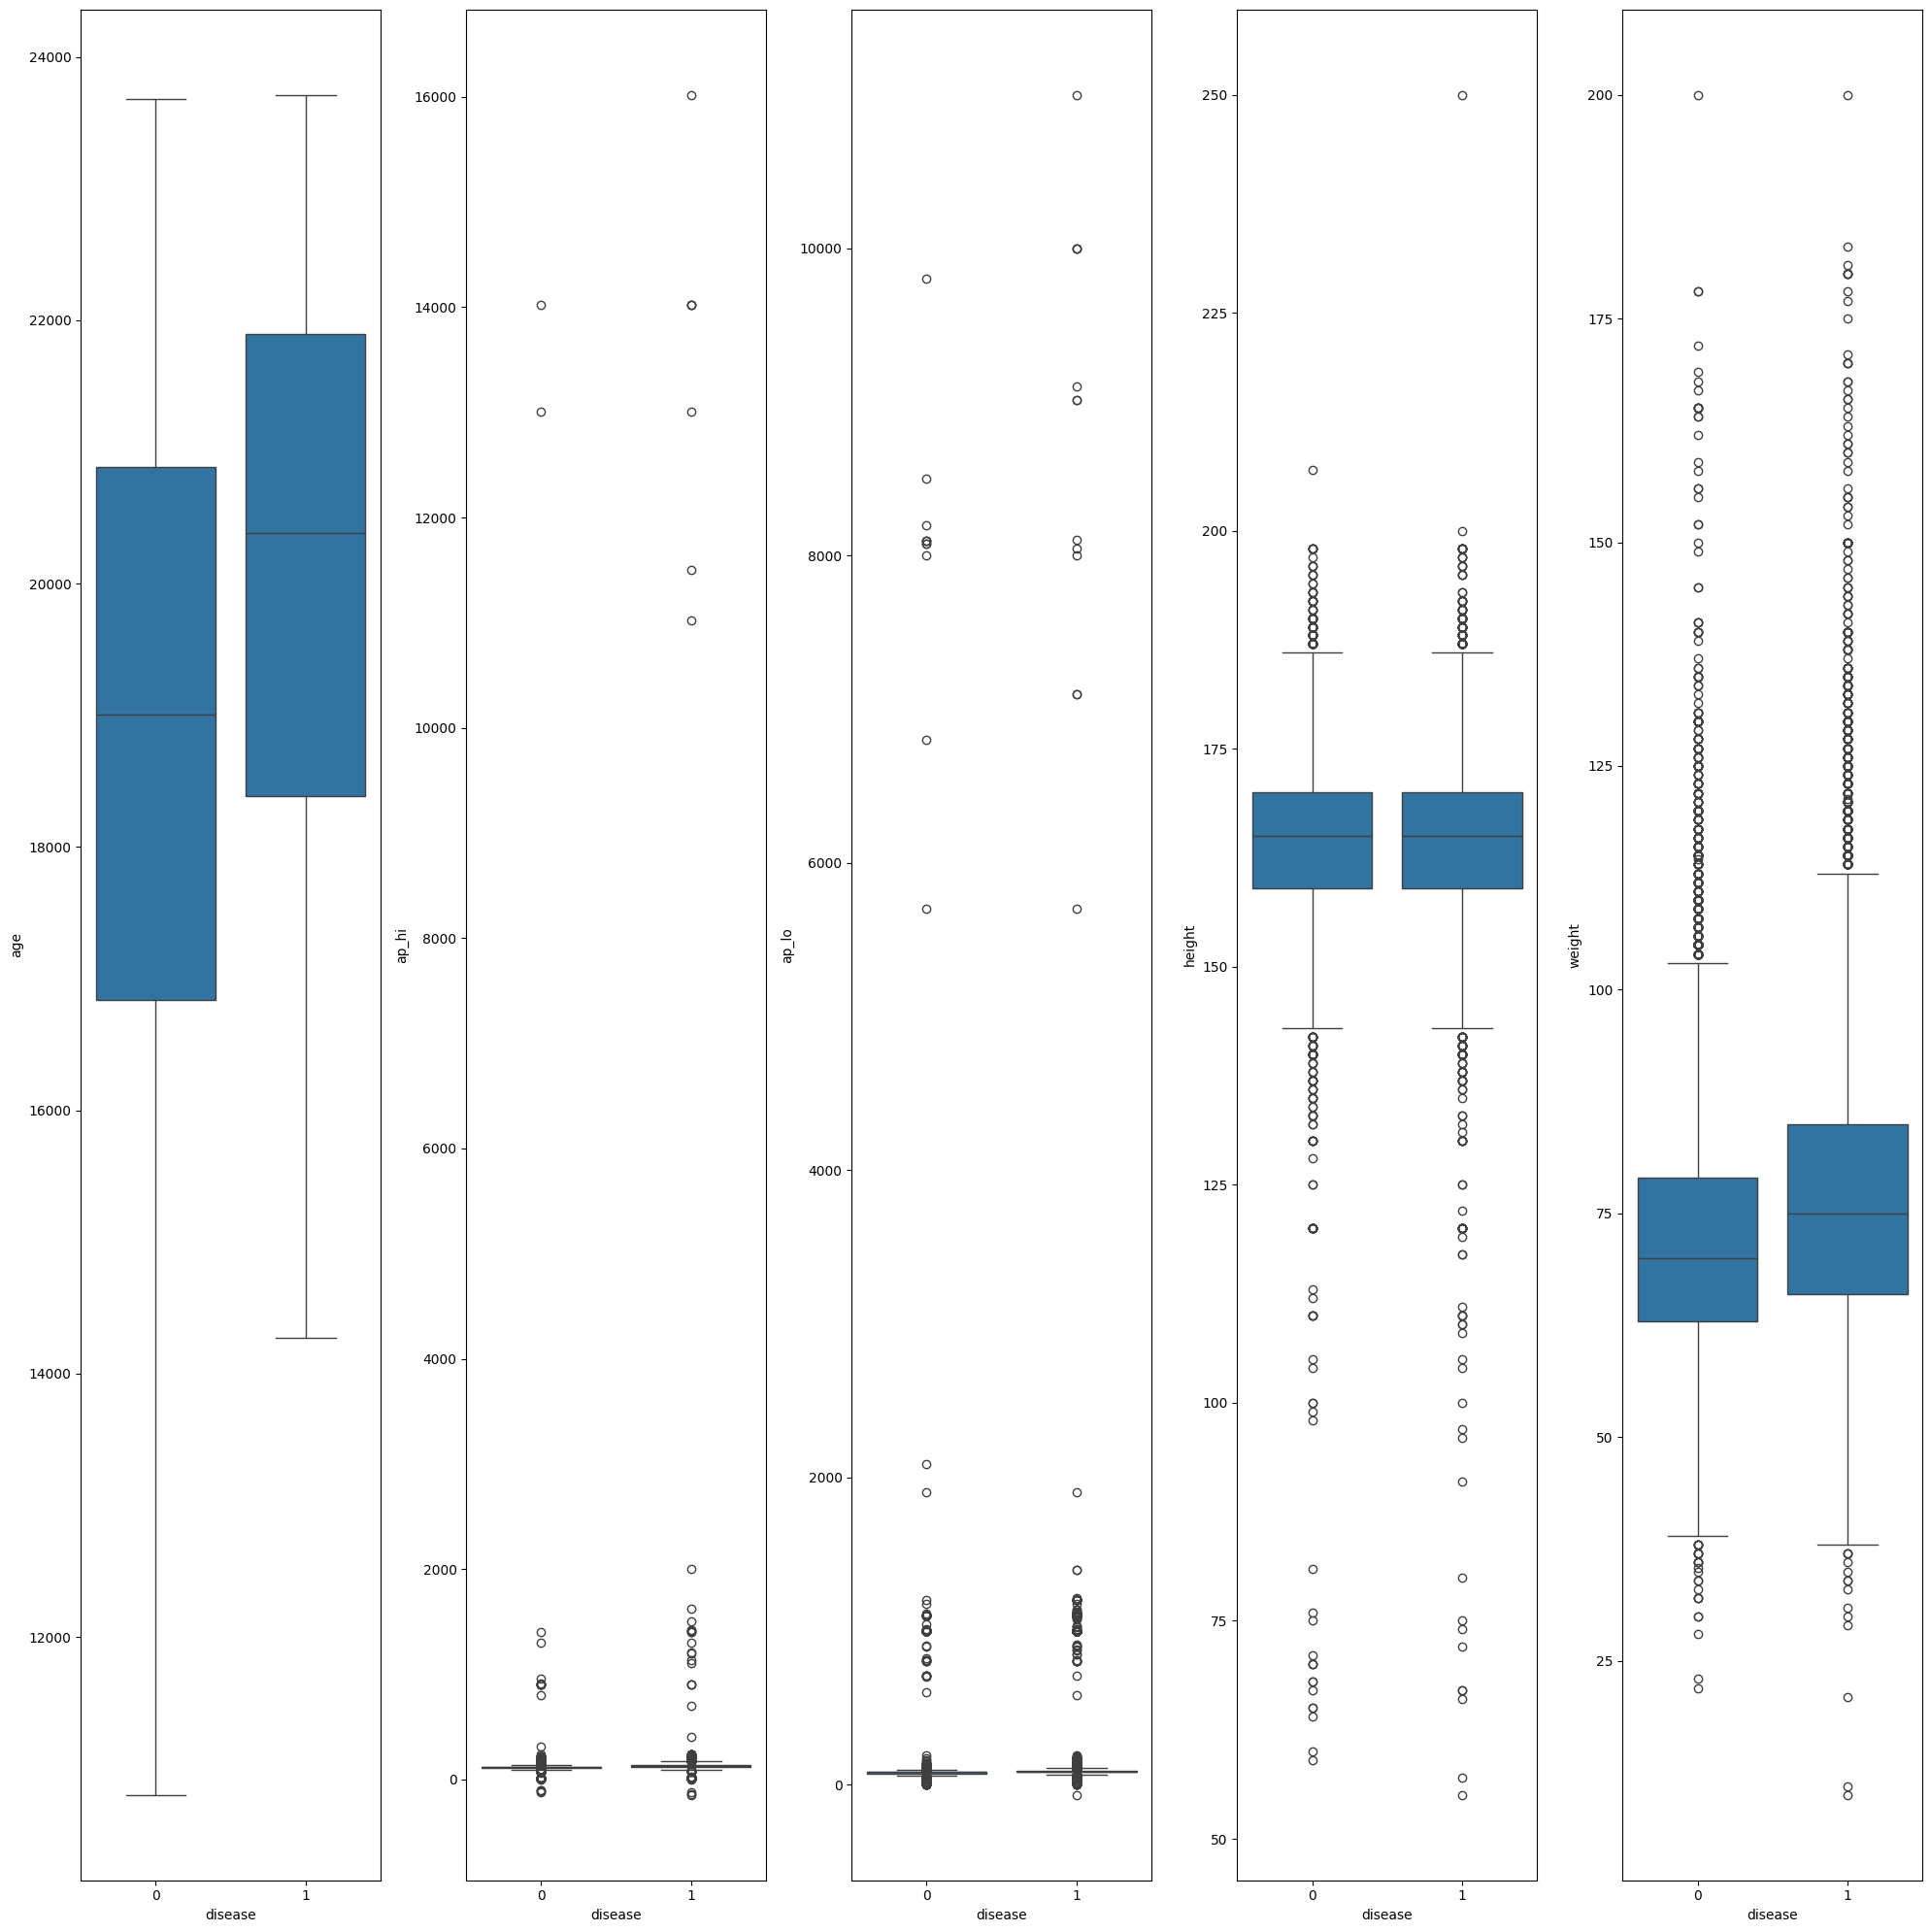

In [ ]:
num_features=['age','ap_hi','ap_lo','height','weight']
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_features):
    plt.subplot( 1,5, i+1)
    sns.boxplot(x='disease', y=col, data = df)
    plt.tight_layout()
    
plt.show()

- dropping irrelevant columns

In [10]:
df = df.drop(columns= ['id','date'])
df['gender'] = df['gender'].map({1: 0, 2: 1})  # assuming 1=Male, 2=Female

- scaling features for numerical columns

In [11]:
num_cols = ['age', 'ap_hi', 'ap_lo', 'height', 'weight']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


-  encoding categorical columns

In [12]:

#one-hot encoding the columns 
df = pd.get_dummies(df, columns=['country', 'occupation'], drop_first=True)

df.head()


,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,...,country_Malaysia,country_Singapore,occupation_Architect,occupation_Chef,occupation_Doctor,occupation_Engineer,occupation_Lawyer,occupation_Nurse,occupation_Others,occupation_Teacher
0,1,-0.436062,0,-0.122182,-0.088238,1,1,1,0.443452,0,...,False,False,True,False,False,False,False,False,False,False
1,1,0.307686,0,0.072610,-0.035180,3,0,1,-1.018168,0,...,True,False,False,False,False,False,False,False,False,False
2,0,-0.247997,0,0.007679,-0.141297,3,0,1,0.078047,0,...,False,False,False,True,False,False,False,False,False,False
3,1,-0.748152,0,0.137541,0.017879,1,1,1,0.565254,0,...,False,True,False,False,False,False,True,False,False,False
4,0,-0.808543,0,-0.187113,-0.194356,1,0,1,-1.018168,0,...,False,True,True,False,False,False,False,False,False,False


- initialising dependent and independent variables and splitting the training and testing datasets

In [13]:
x = df.drop(['disease'], axis= 1)
y = df['disease']
print(x.head())
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

   active       age  alco     ap_hi     ap_lo  cholesterol  gender  gluc  \
0       1 -0.436062     0 -0.122182 -0.088238            1       1     1   
1       1  0.307686     0  0.072610 -0.035180            3       0     1   
2       0 -0.247997     0  0.007679 -0.141297            3       0     1   
3       1 -0.748152     0  0.137541  0.017879            1       1     1   
4       0 -0.808543     0 -0.187113 -0.194356            1       0     1   

     height  smoke  ...  country_Malaysia  country_Singapore  \
0  0.443452      0  ...             False              False   
1 -1.018168      0  ...              True              False   
2  0.078047      0  ...             False              False   
3  0.565254      0  ...             False               True   
4 -1.018168      0  ...             False               True   

   occupation_Architect  occupation_Chef  occupation_Doctor  \
0                  True            False              False   
1                 False         

####  Logistic Regression 

Logistic Regression Accuracy: 0.722
              precision    recall  f1-score   support

           0       0.70      0.77      0.74     10539
           1       0.74      0.67      0.71     10461

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000

[[8113 2426]
 [3409 7052]]


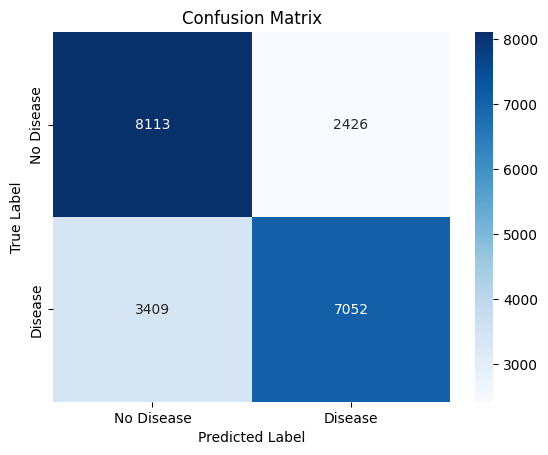

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
log_accuracy = accuracy_score(y_test, y_pred)
log_cm = confusion_matrix(y_test, y_pred)

print(f'Logistic Regression Accuracy: {log_accuracy:.3f}')
print(classification_report(y_test,y_pred))
print(log_cm)

sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()


#### Decision Tree

Decision Tree Accuracy: 0.629
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     10539
           1       0.63      0.63      0.63     10461

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000

[[6613 3926]
 [3873 6588]]


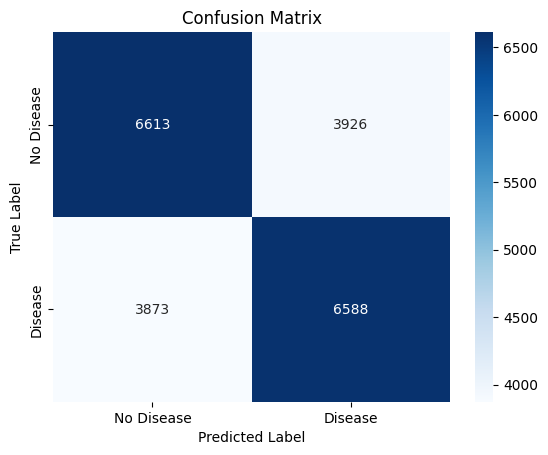

Train Accuracy: 1.000


In [14]:

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)
dec_accuracy = accuracy_score(y_test, y_pred)
dec_cm = confusion_matrix(y_test, y_pred)

print(f'Decision Tree Accuracy: {dec_accuracy:.3f}')
print(classification_report(y_test,y_pred))
print(dec_cm)
sns.heatmap(dec_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()
train_pred = dec_tree.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Train Accuracy: {train_accuracy:.3f}")



#### KNN

KNN Accuracy: 0.599
              precision    recall  f1-score   support

           0       0.60      0.63      0.61     10539
           1       0.60      0.57      0.59     10461

    accuracy                           0.60     21000
   macro avg       0.60      0.60      0.60     21000
weighted avg       0.60      0.60      0.60     21000

[[6588 3951]
 [4461 6000]]


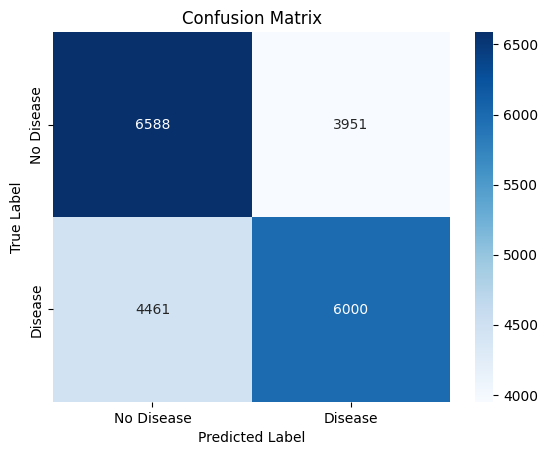

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_cm = confusion_matrix(y_test, y_pred)

print(f'KNN Accuracy: {knn_accuracy:.3f}')
print(classification_report(y_test,y_pred))
print(knn_cm)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()


#### SVM 

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy: 0.547
              precision    recall  f1-score   support

           0       0.58      0.34      0.43     10539
           1       0.53      0.75      0.62     10461

    accuracy                           0.55     21000
   macro avg       0.56      0.55      0.53     21000
weighted avg       0.56      0.55      0.53     21000

[[3616 6923]
 [2591 7870]]


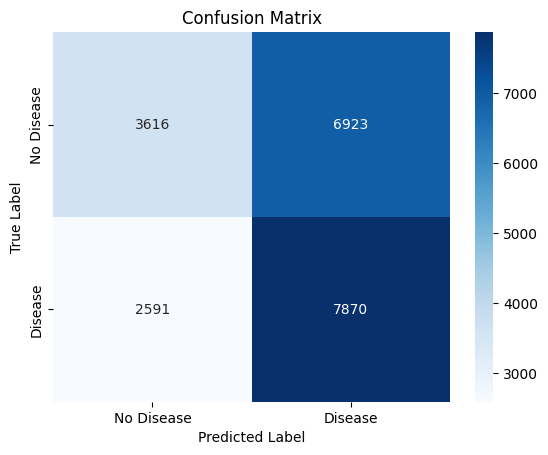

In [ ]:

from sklearn.svm import SVC

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm = SVC(kernel = 'linear', max_iter=1000)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_cm = confusion_matrix(y_test, y_pred)

print(f'SVM Accuracy: {svm_accuracy:.3f}')
print(classification_report(y_test,y_pred))
print(svm_cm)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()


## Observations
- Logistic Regression was the best performing model and had good and balanced precision and recall scores
- KNN and SVM struggle likely due to high dimensionality
- Decision Tree slightly overfits
